In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import math
import array

In [2]:
df = pd.read_csv('D:\\M tech project\\newdata2000to2003.csv')

In [3]:
df['Time'][len(df)-1] # for last day 

'2003-12-31 23:00:00'

In [4]:
df.head() # Show file

,DHI,DNI,GHI,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Time
0,0,0,0,20,970,93.02,177.08,234.4,0.3,2000-01-01 00:00:00
1,0,0,0,19,970,97.36,164.22,264.5,0.4,2000-01-01 01:00:00
2,0,0,0,19,960,100.00,150.44,286.8,0.5,2000-01-01 02:00:00
3,0,0,0,19,960,98.15,136.67,303.4,0.7,2000-01-01 03:00:00
4,0,0,0,19,960,96.73,123.02,309.7,0.8,2000-01-01 04:00:00


In [5]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    sequence = np.array(sequence).tolist()
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    #print(X)
    #print(y)
    return (X,y)
 
# define input sequence
raw_seq = ['GHI']
# choose a number of time steps
n_steps = 24
# split into samples


In [6]:
(X1, y1) = split_sequence(df['GHI'], n_steps)
(X2, y2) = split_sequence(df['Temperature'], n_steps)
(X3, y3) = split_sequence(df['Relative Humidity'], n_steps)
(X4, y4) = split_sequence(df['Solar Zenith Angle'], n_steps)
n_features = 4
y = y1

In [7]:
def normalise(arr):
    mx = -1
    mn = 1<<32
    for row in arr:
        for ele in row:
            if ele<mn:
                mn = ele
            if ele>mx:
                mx = ele
        
    rng = mx-mn
    newArr = []
    for row in arr:
        newRow = []
        for ele in row:
            newRow.append((ele-mn)/rng)
        newArr.append(newRow)
    return newArr

In [8]:
X1norm = normalise(X1)
X2norm = normalise(X2)
X3norm = normalise(X3)
X4norm = normalise(X4)

In [9]:
print(type(X1))
print(type(X1[0]))
print(len(X1))
print(len(X1[0]))

<class 'list'>
<class 'list'>
35016
24


In [10]:
X = []
for i in zip(X1norm,X2norm,X3norm,X4norm):
    newRow = [*i[0],*i[1],*i[2],*i[3]]
    X.append(newRow)

In [11]:
print(len(X))
print(len(X[0]))
print(type(X))
print(type(X[0]))

35016
96
<class 'list'>
<class 'list'>


In [12]:
a = [[1,2,3],
     [4,5,6]
    ]
b = [[7,8,9],
     [10,11,12]
    ]
c= []
for i in zip(a,b):
    a1 = i[0]
    b1 = i[1]
    c1 = [*a1,*b1]
    c.append(c1)
print(c)

[[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]


In [13]:
#plt.plot(df['Time'],df['GHI'])
#plt.show()

array([[<AxesSubplot:title={'center':'GHI'}>]], dtype=object)

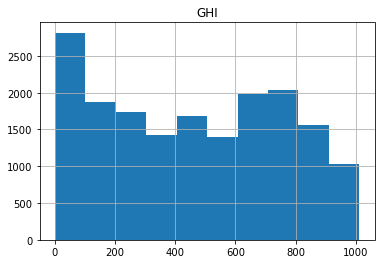

In [14]:
df[df['GHI']!=0].hist(column='GHI')

In [15]:
print(type(y))

<class 'list'>


In [16]:
n_features = 1

In [17]:
import tensorflow as tf
from tensorflow import keras
# define model
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=n_steps*n_features, activation = 'relu'), #1 =output, input = stepes,
    keras.layers.Dense(1, activation = 'relu')
])

model.compile(optimizer='adam',   
              loss='mse')#Adam is an optimization algorithm that can be used 
#instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


In [ ]:
model.fit(X1norm, y, epochs=4000,verbose=1) #An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

Epoch 1/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 80145.0078
Epoch 2/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 6807.8838
Epoch 3/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 4508.3853
Epoch 4/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 4242.2949
Epoch 5/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 4047.5581
Epoch 6/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3883.9260
Epoch 7/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3768.5649
Epoch 8/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3681.1479
Epoch 9/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3613.1074
Epoch 10/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3564.5806
Epoch 11/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3523.0374
Epoch 12/4000
1095/1095 [====

Epoch 183/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3051.5427
Epoch 184/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3053.1938
Epoch 185/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3052.3569
Epoch 186/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3048.6182
Epoch 187/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3053.8582
Epoch 188/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3051.1699
Epoch 189/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3049.9158
Epoch 190/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3049.5554
Epoch 191/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3051.5300
Epoch 192/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3046.5603
Epoch 193/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3048.5654
Epoch 194/

1095/1095 [==============================] - 1s 1ms/step - loss: 3001.5974
Epoch 365/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3004.2271
Epoch 366/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3004.7385
Epoch 367/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3004.3613
Epoch 368/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3006.6582
Epoch 369/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3006.6814
Epoch 370/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3003.4609
Epoch 371/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3004.3477
Epoch 372/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3004.4670
Epoch 373/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3006.6172
Epoch 374/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3001.8103
Epoch 375/4000
1095/1095 

1095/1095 [==============================] - 1s 1ms/step - loss: 2978.8855
Epoch 546/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2981.0801
Epoch 547/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2981.2605
Epoch 548/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2981.6343
Epoch 549/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2980.9436
Epoch 550/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2980.3850
Epoch 551/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2982.0398
Epoch 552/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2978.2163
Epoch 553/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2981.0918
Epoch 554/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2980.3850
Epoch 555/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2980.3989
Epoch 556/4000
1095/1095 

1095/1095 [==============================] - 1s 1ms/step - loss: 2966.4331
Epoch 727/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2969.1250
Epoch 728/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2965.9272
Epoch 729/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2968.2644
Epoch 730/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2963.9866
Epoch 731/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2969.9116
Epoch 732/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2968.0867
Epoch 733/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2966.7278
Epoch 734/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2964.9524
Epoch 735/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2967.7373
Epoch 736/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 2967.4785
Epoch 737/4000
1095/1095 

Epoch 817/4000
1095/1095 [==============================] - 1s 880us/step - loss: 2961.7998
Epoch 818/4000
1095/1095 [==============================] - 1s 835us/step - loss: 2962.9116
Epoch 819/4000
1095/1095 [==============================] - 1s 867us/step - loss: 2963.0947
Epoch 820/4000
1095/1095 [==============================] - 1s 830us/step - loss: 2961.8169
Epoch 821/4000
1095/1095 [==============================] - 1s 868us/step - loss: 2958.3569
Epoch 822/4000
1095/1095 [==============================] - 1s 820us/step - loss: 2962.0337
Epoch 823/4000
1095/1095 [==============================] - 1s 852us/step - loss: 2961.5549
Epoch 824/4000
1095/1095 [==============================] - 1s 868us/step - loss: 2960.1228
Epoch 825/4000
1095/1095 [==============================] - 1s 871us/step - loss: 2957.0581
Epoch 826/4000
1095/1095 [==============================] - 1s 857us/step - loss: 2960.3025
Epoch 827/4000
1095/1095 [==============================] - 1s 860us/step - loss

In [50]:
model.save('D:\\raju Singh\\M tech project\\MLP1feature')

INFO:tensorflow:Assets written to: D:\raju Singh\M tech project\MLP1feature\assets


In [20]:
#Testing

In [51]:
from tensorflow import keras
model = keras.models.load_model('D:\\raju Singh\\M tech project\\MLP1feature')

In [52]:
df = pd.read_csv('D:\\M tech project\\newdata2004.csv')

In [53]:
df.head()

,DHI,DNI,GHI,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Time
0,0,0,0,19,970,66.62,177.09,154.3,3.0,2004-01-01 00:00:00
1,0,0,0,18,970,69.33,164.22,159.4,2.8,2004-01-01 01:00:00
2,0,0,0,17,970,72.41,150.44,163.6,2.7,2004-01-01 02:00:00
3,0,0,0,17,970,76.07,136.67,168.8,2.6,2004-01-01 03:00:00
4,0,0,0,16,970,80.20,123.02,175.4,2.3,2004-01-01 04:00:00


In [54]:
(X1test, y1test) = split_sequence(df['GHI'], n_steps)
(X2test, y2test) = split_sequence(df['Temperature'], n_steps)
(X3test, y3test) = split_sequence(df['Relative Humidity'], n_steps)
(X4test, y4test) = split_sequence(df['Solar Zenith Angle'], n_steps)
n_features = 1
y_test = y1test

In [55]:
len(y_test)

8736

In [56]:
len(X1test)

8736

In [57]:
X1test_norm = normalise(X1test)
X2test_norm = normalise(X2test)
X3test_norm = normalise(X3test)
X4test_norm = normalise(X4test)

In [58]:
X_test = []
for i in zip(X1test_norm,X2test_norm,X3test_norm,X4test_norm):
    newRow = [*i[0],*i[1],*i[2],*i[3]]
    X_test.append(newRow)

In [59]:
len(X_test)

8736

In [ ]:
y_model = model.predict(X1test_norm)

In [60]:
def predictHR(yer,m,d,h):
    timeStamp = pd.Timestamp(year = yer,month=m,day=d,hour=h)
    timeStamp = str(timeStamp)
    i = 0
    while i <len(df):
        Time = df['Time'][i]
        if Time==timeStamp:
            test_index = i
            break
        i+=1
    print('Actual value:',y_test[test_index])
    return y_model[test_index][0]
    

In [61]:
print('Predicted:',predictHR(2004,12,28,15))

Actual value: 408
Predicted: 413.43152


In [62]:
y_model = model.predict(X1test_norm)

In [63]:
score = model.evaluate(X1test_norm,y_test)
print('model mean: ',np.mean(y_model))
print('actual mean: ',np.mean(y_test))
print('MSE: ',score)
print('RMSE: ',math.sqrt(score))

273/273 [==============================] - 0s 638us/step - loss: 2423.8621
model mean:  233.3136
actual mean:  234.74679487179486
MSE:  2423.862060546875
RMSE:  49.23273362862228


In [64]:
St = 0
ymean = np.mean(y_test)
for yi in y_test:
    St += (yi-ymean)**2


In [41]:
Sr = 0
for i in range(len(y_model)):
    Sr += (y_test[i]-y_model[i])**2


In [42]:
R2 = 1- Sr/St
print(R2)

[0.9755662]


In [43]:
xa = np.linspace(0,max(y_test),max(y_test))

In [44]:
%matplotlib qt5

In [45]:
#fig1 = plt.figure(1)
#ax1 = fig1.add_axes([0,0.02,1.2,1.2],frameon=True,xlabel="Actual")
#ax1.set_fontsize
#s1 = ax1.scatter(y,y_model)

#p1 = ax1.plot(xa,xa,'-r')
#ax1.set_ylabel('Predicted', fontsize=25)
#ax1.set_xlabel('Actual',fontsize=25)

#plt.show()

In [46]:
plt.scatter(y_test,y_model)
plt.plot(xa,xa,'-r')
plt.ylabel('Predicted Irradiance (W/sq m)',fontsize=35)
plt.xlabel('Measured Irradiance (W/sq m)',fontsize=35)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [47]:
xb = np.linspace(1,len(y_test),len(y_test))

In [48]:

plt.plot(xb,y_model,'b--',label='Predicted Irradiance (W/sq m)')
plt.legend(loc=1, prop={'size': 20})

plt.plot(xb,y_test,'r',label='Measured Irradiance (W/sq m)')
plt.legend(loc=1, prop={'size': 20})

plt.ylabel('GHI (W/sq m)',fontsize=35)
plt.xlabel('Time(hours)',fontsize=35)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [65]:
area_of_pv = 700 #meter sq

In [66]:
efficiency = 17.32

In [67]:
derating_pv = 0.85

In [68]:
temp = df['Temperature']

In [69]:
pv = []
for i in range(len(y_test)):
    pv.append(area_of_pv *efficiency *y_test[i] *(1-0.005*(temp[i]-25)))

In [70]:
pv_predicted = []
for i in range(len(y_model)):
    pv_predicted.append(area_of_pv *efficiency *y_model[i] *(1-0.005*(temp[i]-25)))

In [71]:
day = 200
beg = 24 * day
end = 24 * (day+5) +1

In [72]:
xb = np.linspace(1,len(y_test[beg:end]),len(y_test[beg:end]))

In [73]:


plt.plot(xb,pv_predicted[beg:end],'b--',linewidth = 4,label='Predicted Power (kW)')
plt.legend(loc=1, prop={'size': 20})

plt.plot(xb,pv[beg:end],'r-',linewidth = 2,label='Measured Power(kW)')
plt.legend(loc=1, prop={'size': 20})

plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Power (kW)',fontsize=35)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [74]:
xc = np.linspace(1,len(pv_predicted),len(pv_predicted))

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xc,pv,'r',label='Measured Power(kW)')
plt.legend(loc=1, prop={'size': 15})
plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Measured Power (kW)',fontsize=35)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)


plt.subplot(1,2,2)
plt.plot(xc,pv_predicted,'b',label='Predicted Power (kW)')
plt.legend(loc=1, prop={'size': 15})
plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Predicted Power (kW)',fontsize=35)


plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()